Gilberto Garcia

ASTR5900

HW2 - Root Finding

8 February 2024

___

# Question 1

Consider the following equation:

$$ x^3 - 7x^2 + 14x - 5 = 0 $$

Find a solution to the equation by hand to a precision smaller than 0.01 using 


(a) the bisection method (with initial guess of $x_i$ = 0 and 1)


(b) using the Newton Raphson method (with $x_i$ = 0).


(c) How many iterations did it take for each method?

## a

A description of the bisection method can be found [here](https://en.wikipedia.org/wiki/Bisection_method). We first employ it by hand to solve the roots for the equation above.

**iteration #1:**

We start with the given bounds of a=0 and b=1. 

f(a) = -5 and f(b) = 3.
The midpoint is (0+1)/2 = 0.5 and f(0.5) = 0.375.

Now because f(a)* f(midpoint) < 0, then we set b equal to the midpoint and repeat.

**iteration #2:**

a = 0, b = 0.5. 

f(a) = -5, f(b) = 0.375

So the midpoint is 0.25 and f(midpoint) = -1.922.

We can now test for precision using the test:

$\text{precision} = |\frac{\text{midpoint}_{\text{new}} - \text{midpoint}_{\text{old}}}{\text{midpoint}_{\text{old}}}| < 0.01 $

In this case, precision = 1, so we continue.

Because f(a) * f(midpoint) > 0, a = midpoint.

**iteration #3:**

a = 0.25, b = 0.5.

f(a) = -1.922, f(b) = 0.375

midpoint = 0.375 and f(midpoint) = -0.682

precision = 0.5, so we continue.

Because f(a) * f(midpoint) > 0, a = midpoint.

**iteration #4:**

a = 0.375, b = 0.5.

f(a) = -0.682, f(b) = 0.375

midpoint = 0.4375 and f(midpoint) = -0.1311

precision = 0.166, so we continue.

Because f(a) * f(midpoint) > 0, a = midpoint.

**iteration #5:**

a = 0.4375, b = 0.5.

f(a) = -0.1311, f(b) = 0.375

midpoint = 0.46875 and f(midpoint) = 0.1274

precision = 0.071, so we continue.

Because f(a) * f(midpoint) < 0, b = midpoint.

**iteration #6:**

a = 0.4375, b = 0.46875.

f(a) = -0.1311, f(b) = 0.1274

midpoint = 0.453125 and f(midpoint) = -0.000469

precision = 0.034, so we continue.

Because f(a) * f(midpoint) > 0, a = midpoint.

**iteration #7:**


a = 0.453125, b = 0.46875.

f(a) = -0.000469, f(b) = 0.1274

midpoint = 0.4609375 and f(midpoint) = 0.0638136

precision = 0.017, so we continue.

Because f(a) * f(midpoint) < 0, b = midpoint.

**iteration #8:**


a = 0.453125, b = 0.4609375.

f(a) = -0.000469, f(b) = 0.0638136

midpoint = 0.45703125 and f(midpoint) = 0.031758

precision = 0.00854, so we have met our tolerance requirement and we stop.



Thus, our root is $\boxed{x=0.45703125}.$




## b

We will again try to find the roots to the equation above. This time, we will use the Newton Raphson method, described [here](https://en.wikipedia.org/wiki/Newton%27s_method).

**iteration #1**

We start with the given intial guess of 0.

We calculate f(0)=-5 and f'(0)=14.

Now we use the Newton iterative function:

$$
x_i = x_0 - \frac{f(x_0)}{f(x_0)}
$$

We get that x_1 = 0.35714.

We test the precision in the same way as above:

$\text{precision} = |\frac{\text{x}_{\text{i}} - \text{x}_0}{\text{x}_0}| < 0.01 $

precision = 1. So we continue.


**iteration #2**

Now we have $x_1$ = 0.35714.

We calculate f($x_1$)=-0.84733 and f'($x_1$)=9.38268.

Using the, Newton iterative function, we get that $x_2$ = 0.4474.

The precision = 0.252. So we continue.

**iteration #3**

Now we have $x_2$ = 0.4474.

We calculate f($x_2$)=-0.048 and f'($x_2$)=8.3369.

Using the, Newton iterative function, we get that $x_3$ = 0.453157.

The precision = 0.0128. So we continue.

**iteration #4**

Now we have $x_2$ = 0.453157.

We calculate f($x_2$)=-0.000204 and f'($x_2$)=8.27185.

Using the, Newton iterative function, we get that $x_4$ = 0.45318166.

The precision = 0.0.00005. So we stop here.

Our root is $\boxed{x =0.45318166} $


## c

The bisection method took 8 iterations while the Newton-Raphson method took 4 iterations. The convergence is clearly much faster in the Newton method. The precision decreases at a much faster rate in the Newton method than in the bisection.

# Question 2

Write a code tha computes roots using each of these methods (bisection and Newton-Raphson). Your code should allow inputs for the initial guess(es), and the maximum error tolerance for the solution ($\epsilon$). It should return the solution and count the number of steps taken.

(a) Use your code to find a solution to the equation in problem 1, to a precision of $\epsilon < 10^{-8}$. Show the outputs of each step. How many iterations did each of the two methods take?


(b) How sensitive is the number of iterations to the location of your initial guess? To answer this, simply try 3 or 4 different initial guesses (further or closer to the known answer), and comment on what you find.

(c) Using the Newton-Raphson, experiment with intial guesses and see if you can find any that would lead your code astray. Describe and comment on what you find.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 ## a
 
 we first write out our function and its derivative into python functions:

In [2]:
def func1(x):
    return x**3 - 7*x**2 + 14*x - 5

def func1_prime(x):
    return 3*x**2 - 14*x + 14

We plot the function to see its behavior:

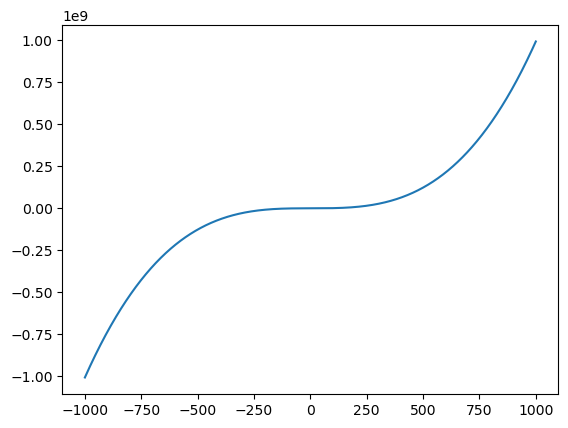

In [25]:
x_lst = np.linspace(-1_000,1_000,2_000)
f_y_lst = func1(x_lst)

plt.plot(x_lst,f_y_lst)
plt.show()

We now code both of the root finding methods:

In [5]:
#bisection method

def bisection(function,a,b,tolerance,max_iterations,print_steps=False):
    '''
    inputs:
        - function: the function we wish to find a root for.
                the function should be a python function itself.
        - (a,b): the range we expect to find the root to be within
        - tolerance: how small we want the difference between
                the solution and 0 to be
        - max_iterations: if no root exists, we set a maximum iterations
                to prevent infinite loops
        -print_steps: if user wants each iteration's root to be printed, 
                they can set print_steps=True
    outputs:
        - the root of the function if it exists
        - or an error if no convergance is reached
    '''
    
    
    
    
    #we compute the first iteration of f(a) and f(b)
    f_a,f_b = function(a),function(b) 
    #we compute the midpoint of a and b and compute f(midpoint)
    midpoint = (a + b)/2
    f_midpoint = function(midpoint)
    
    
    #as long as we haven't reached our max iterations, we continue finding the root
    counter = 0   
    while counter <= max_iterations:
        #determine if the midpoint is our new lower or upper bound
        sign_test = f_midpoint * f_a
        if sign_test < 0:
            b = midpoint
        else:
            a = midpoint
        #find the next iteration of f(a), f(b) and midpoint values:
        f_a1,f_b1 = function(a),function(b)
        midpoint1 = (a + b)/2.0
        f_midpoint1 = function(midpoint1)
        #avoid divide by zero errors by not calculating rel diff if midpoint is equivalent to 0
        if midpoint == 0:
            pass
        else:
            #check if difference in x values is within our tolerance
            relative_x_diff = (midpoint1 - midpoint) / midpoint
            #if it is, our root has been found and we break
            if abs(relative_x_diff) < tolerance:
                root = midpoint1
                break
        #increase the counter
        counter += 1
        #if the user wants, each step will be printed:
        if print_steps == True:
            print('iteration step: {}\t root: {}'.format(counter,midpoint))
        #otherwise, we update the old f(a),f(b), midpoint and f(midpoint) values to be the new values
        f_a,f_b = f_a1,f_b1
        midpoint = midpoint1
        f_midpoint = f_midpoint1
        #raise error if maximum iteration steps is reached
        if counter > max_iterations:
            raise ValueError('maximum iterations steps reached')
    #print('convergence reached in: ',counter,' steps')
    return root,counter

In [6]:
#we test it using the parameters given in the problem, we also print out each iteration
lower_bound, upper_bound = 0.,1.
tolerance = 10**(-8)
max_iters = 1_000
root1_bisection = bisection(func1,lower_bound,upper_bound,tolerance,max_iters,True)
print()
print('the root using bisection method is {}'.format(root1_bisection[0]))

iteration step: 1	 root: 0.5
iteration step: 2	 root: 0.25
iteration step: 3	 root: 0.375
iteration step: 4	 root: 0.4375
iteration step: 5	 root: 0.46875
iteration step: 6	 root: 0.453125
iteration step: 7	 root: 0.4609375
iteration step: 8	 root: 0.45703125
iteration step: 9	 root: 0.455078125
iteration step: 10	 root: 0.4541015625
iteration step: 11	 root: 0.45361328125
iteration step: 12	 root: 0.453369140625
iteration step: 13	 root: 0.4532470703125
iteration step: 14	 root: 0.45318603515625
iteration step: 15	 root: 0.453155517578125
iteration step: 16	 root: 0.4531707763671875
iteration step: 17	 root: 0.45317840576171875
iteration step: 18	 root: 0.4531822204589844
iteration step: 19	 root: 0.45318031311035156
iteration step: 20	 root: 0.45318126678466797
iteration step: 21	 root: 0.45318174362182617
iteration step: 22	 root: 0.45318150520324707
iteration step: 23	 root: 0.4531816244125366
iteration step: 24	 root: 0.4531816840171814
iteration step: 25	 root: 0.4531817138195038

In [8]:
#newton raphson

def newton_raphson(function,function_prime,initial_guess,tolerance,max_iterations,print_steps=False):
    '''
    inputs:
        - the function we want to find a root for (function should be passed as a python function)
        - the derivative of the given function (also passed as a python function)
        - initial_guess: an educated guess of where the root lives
        - tolerance: how small we want the difference between our solution and 0 to be
        - max_iterations: if no root exists, we set a maximum iterations
                to prevent infinite loops
        -print_steps: if user wants each iteration's root to be printed, 
                they can set print_steps=True
                
    outputs:
        - the root of the function if it exists
        - or an error if no convergance is reached
    '''
    
    #initialize our starting x value
    x0 = initial_guess
    #we evaluate the function and its derivative at the initial guess
    f_x = function(x0)
    fprime_x =function_prime(x0)
    
    #we initialize our counter
    counter = 0
    #we apply the newton raphson method until we reach our root
    while counter <= max_iterations:
        #compute the newton-raphson iteration
        xi = x0 - (f_x / fprime_x)
        #if this new value is within the range for our root tolerance, break
        if x0 == 0:
            pass
        else:
            relative_x_diff = (xi - x0)/x0
            #print(abs(relative_x_diff))
            if abs(relative_x_diff) < tolerance:
                root = xi
                break
        x0 = xi
        f_x = function(x0)
        fprime_x = function_prime(x0)
        counter += 1
        #if user wants, each step will be printed:
        if print_steps == True:
            print('iteration step: {}\t root: {}'.format(counter,xi))
        #otherwise, update x0,f(x),f'(x) and repeat
        #raise error if maximum iterations steps is reached
        if counter > max_iterations:
            raise ValueError('maximum iterations steps reached')
        
    #print('convergence reached in: ',counter,' steps')    
    return root,counter

In [9]:
#we test it using the parameters given in the problem, we also print out each iteration
initial_guess = 0.
tolerance = 10**(-8)
max_iters = 1_000
root1_newton = newton_raphson(func1,func1_prime,initial_guess,tolerance,max_iters,True)
print()
print('the root using Newton-Raphson is {}'.format(root1_newton[0]))

iteration step: 1	 root: 0.35714285714285715
iteration step: 2	 root: 0.44744814728501514
iteration step: 3	 root: 0.453159435118196
iteration step: 4	 root: 0.4531817227771845

the root using Newton-Raphson is 0.453181723115918


## b

Let's now try different sets of initial guesses for bisection method. We will keep the tolerance and maximum iterations allowed the same as above.

In [10]:
lower_bound, upper_bound = -1.,2.
root,counter = bisection(func1,lower_bound,upper_bound,tolerance,max_iters,False)
print('convergence reached in: ',counter,' steps')

convergence reached in:  28  steps


In [11]:
lower_bound, upper_bound = -10.,11.
root,counter = bisection(func1,lower_bound,upper_bound,tolerance,max_iters,False)
print('convergence reached in: ',counter,' steps')

convergence reached in:  31  steps


In [12]:
lower_bound, upper_bound = -(10**2.),1.1*10**2.
root,counter = bisection(func1,lower_bound,upper_bound,tolerance,max_iters,False)
print('convergence reached in: ',counter,' steps')

convergence reached in:  34  steps


In [13]:
lower_bound, upper_bound = -(10**4),2.
root,counter = bisection(func1,lower_bound,upper_bound,tolerance,max_iters,False)
print('convergence reached in: ',counter,' steps')

convergence reached in:  40  steps


In [14]:
lower_bound, upper_bound = -1.,10**(10)
root,counter = bisection(func1,lower_bound,upper_bound,tolerance,max_iters,False)
print('convergence reached in: ',counter,' steps')

convergence reached in:  59  steps


We can see that the convergence counter seems to increase steadily as we increase our initial range. We can visualize how the convergence of the bisection looks like. We will keep the lower bound constant at -1 and increase the upper bound from 2 to 1,000:

In [15]:
upper_bound_arr = np.linspace(2,10**3,1_000)

In [16]:
converge_lst = []
for up_bound in upper_bound_arr:
    root,convergence_num = bisection(func1,lower_bound,up_bound,tolerance,max_iters,False)
    converge_lst += [convergence_num]

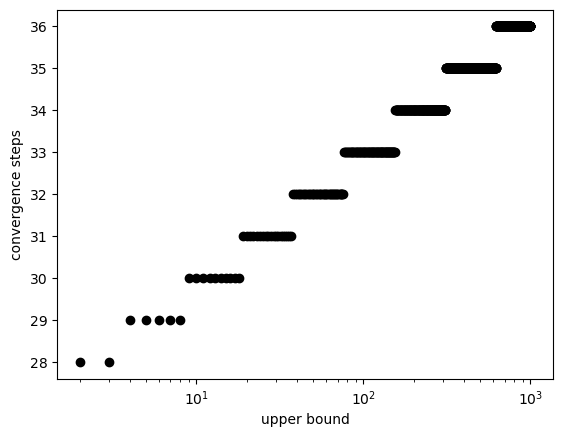

In [17]:
plt.scatter(upper_bound_arr,converge_lst,color='k')
plt.ylabel('convergence steps')
plt.xlabel('upper bound')
plt.xscale('log')
plt.show()

We see that even for a small upper bound, the bisection method takes 28 steps to converge to a tolerance of $10^{-8}$. As we increase the upper bound, the convergence takes a functional form similar to log(x). So as we increase the upper bound, the convergence step doesn't increase a whole lot. The plot above has the x-axis on a log scale, which in turn gives a linear functional form to the convergence.


Let's now take the same approach for the Newton-Raphson method. We start by printing the convergence step at various initial guesses:

In [18]:
initial_guess = 0.
newton,counter = newton_raphson(func1,func1_prime,initial_guess,tolerance,max_iters,False)
print('convergence reached in: ',counter,' steps')

convergence reached in:  4  steps


In [19]:
initial_guess = -5.
newton,counter = newton_raphson(func1,func1_prime,initial_guess,tolerance,max_iters,False)
print('convergence reached in: ',counter,' steps')

convergence reached in:  8  steps


In [20]:
initial_guess = 20.
newton,counter = newton_raphson(func1,func1_prime,initial_guess,tolerance,max_iters,False)
print('convergence reached in: ',counter,' steps')

convergence reached in:  22  steps


In [21]:
initial_guess = 10**2.
newton,counter = newton_raphson(func1,func1_prime,initial_guess,tolerance,max_iters,False)
print('convergence reached in: ',counter,' steps')

convergence reached in:  89  steps


In [22]:
initial_guess = 10**3.
newton,counter = newton_raphson(func1,func1_prime,initial_guess,tolerance,max_iters,False)
print('convergence reached in: ',counter,' steps')

convergence reached in:  58  steps


In [23]:
initial_guess_lst = np.linspace(0,10**3,1_000)
newton_counter = []
for guess in initial_guess_lst:
    root, counter = newton_raphson(func1,func1_prime,guess,tolerance,max_iters,False)
    newton_counter += [counter]

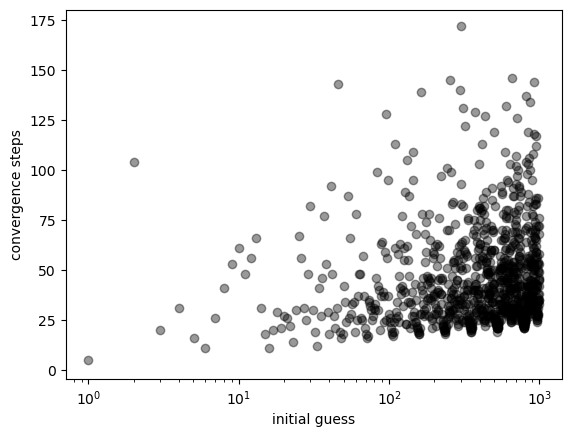

In [24]:
plt.scatter(initial_guess_lst,newton_counter,color='k',alpha=0.4)
plt.ylabel('convergence steps')
plt.xlabel('initial guess')
plt.xscale('log')
plt.show()

From the plot, the Newton Raphson has a lot more noise than the bisection method. However, the underlying form is a very slow increase in convergence steps as we increase the initial guess. The slope of the underlying line here is smaller than the bisection method. This indicates that the convergence of the Newton method is faster generally than the bisection method.

## c